In [1]:
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.6 MB/s eta 0:00:00


In [2]:
from google.colab import auth
from google.colab import drive
import re
import os
import numpy as np
import zipfile
import pandas as pd
import io
from googleapiclient.http import MediaIoBaseDownload
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from lazypredict.Supervised import LazyRegressor
pd.reset_option

In [4]:
# Авторизуемся в Colab
auth.authenticate_user()

# Используем учетные данные Colab
drive.mount('/content/drive')
zip_file='/content/drive/MyDrive/Milk task/milk_data.zip'
#распаковывем зипку
milk_data = zipfile.ZipFile(zip_file)
milk_data.extractall()
#переходим в нужную директорию
zip_directory = '/content/milk_data'
file_list_antibiotics = os.listdir(zip_directory)
#просто проверяем, что все сохранилось и у нас есть доступ
len(file_list_antibiotics)


Mounted at /content/drive


1107

In [5]:
#разбиваем названия файлов на информацию, название антибиотика и концентрацию
antibiotic=[]
concentration=[]
file_name=[]
pd.reset_option('all')
dfs = [[]*len(file_list_antibiotics)]
#читаем файлы
for file_title in file_list_antibiotics:
    file_name=file_title.split('_')
    antibiotic.append(file_name[0])
    concentration.append(float(file_name[1]))
    full_file_path = os.path.join(zip_directory, file_title)
    #считываем столбцы с амперами
    dfs.append([pd.read_csv(full_file_path)['Current, A']])
    file_name=[]
#Создаем массив данных (наша будущая таблица)
big_frame = pd.concat([df[0] for df in dfs[1:]], axis=1)
#переворачиваем таблицу
big_frame_1 = big_frame.transpose()
#сохраняем вольтажи, потом называем столбиками
list_V = pd.read_csv('/content/milk_data/cefazoline_1e-06_1157.csv')['Voltage, V']
#присваиваем столбцам вольты, при которых были проведены измерения
big_frame_1.columns=list_V
#добавляем наши столбцы с названием антибиотика и концентрацией
big_frame_1['antibiotic']=antibiotic
big_frame_1['concentration']=concentration
big_frame_1.sort_values(by='concentration', ascending=False, axis=0)
#сохраняем файл
big_frame_1.to_csv('milk_data.csv', index=False)
big_frame_1



"Voltage, V",-0.8,-0.795,-0.79,-0.785,-0.78,-0.775,-0.77,-0.765,-0.76,-0.755,...,-0.76,-0.765,-0.77,-0.775,-0.78,-0.785,-0.79,-0.795,antibiotic,concentration
"Current, A",-0.000031,-0.000030,-0.000029,-0.000028,-0.000028,-0.000027,-0.000027,-0.000026,-0.000026,-0.000025,...,-0.000030,-0.000030,-0.000030,-0.000030,-0.000030,-0.000030,-0.000030,-0.000031,penicillin,1.000000e-08
"Current, A",-0.000104,-0.000068,-0.000054,-0.000045,-0.000044,-0.000040,-0.000036,-0.000033,-0.000031,-0.000030,...,-0.000039,-0.000039,-0.000039,-0.000040,-0.000040,-0.000040,-0.000040,-0.000040,tetracycline,1.000000e-07
"Current, A",-0.000172,-0.000144,-0.000126,-0.000114,-0.000106,-0.000099,-0.000093,-0.000088,-0.000084,-0.000080,...,-0.000164,-0.000164,-0.000165,-0.000165,-0.000166,-0.000167,-0.000167,-0.000168,tetracycline,1.000000e-07
"Current, A",-0.000023,-0.000023,-0.000022,-0.000021,-0.000021,-0.000020,-0.000020,-0.000019,-0.000019,-0.000018,...,-0.000023,-0.000023,-0.000023,-0.000023,-0.000023,-0.000023,-0.000023,-0.000023,penicillin,1.000000e-09
"Current, A",-0.000051,-0.000037,-0.000029,-0.000025,-0.000028,-0.000025,-0.000023,-0.000022,-0.000022,-0.000020,...,-0.000032,-0.000032,-0.000032,-0.000032,-0.000032,-0.000032,-0.000032,-0.000032,penicillin,1.000000e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Current, A",-0.000054,-0.000052,-0.000050,-0.000049,-0.000048,-0.000046,-0.000045,-0.000044,-0.000043,-0.000042,...,-0.000166,-0.000147,-0.000135,-0.000125,-0.000118,-0.000112,-0.000107,-0.000102,tetracycline,1.000000e-06
"Current, A",-0.000108,-0.000074,-0.000059,-0.000049,-0.000047,-0.000042,-0.000038,-0.000035,-0.000032,-0.000030,...,-0.000042,-0.000042,-0.000042,-0.000042,-0.000042,-0.000043,-0.000043,-0.000043,tetracycline,1.000000e-06
"Current, A",-0.000049,-0.000034,-0.000028,-0.000023,-0.000028,-0.000026,-0.000024,-0.000022,-0.000022,-0.000021,...,-0.000036,-0.000036,-0.000036,-0.000036,-0.000036,-0.000036,-0.000036,-0.000036,penicillin,1.000000e-11
"Current, A",-0.000117,-0.000075,-0.000058,-0.000047,-0.000045,-0.000040,-0.000036,-0.000033,-0.000031,-0.000029,...,-0.000042,-0.000042,-0.000042,-0.000042,-0.000042,-0.000042,-0.000043,-0.000043,tetracycline,1.000000e-07


In [6]:
#находим диапазон концентраций для каждого из антибиотиков
#оставляем только уникальные названия
antibio_unique = set(antibiotic)
for antibio in antibio_unique:
    min_concentraion = big_frame_1[big_frame_1["antibiotic"].str.contains(antibio, flags=re.I)]['concentration'].min()
    max_concentraion = big_frame_1[big_frame_1["antibiotic"].str.contains(antibio, flags=re.I)]['concentration'].max()
    #ура, френдли вывод :)
    print('for', antibio, 'concentration from', min_concentraion, 'to', max_concentraion, sep=' ')
print('number of unique antibiotics:', len(antibio_unique), sep=' ')


for cefazoline concentration from 1e-10 to 1e-06
for streptomycin concentration from 1e-09 to 1e-05
for tetracycline concentration from 1e-10 to 1e-06
for ceftiofur concentration from 1e-10 to 1e-06
for penicillin concentration from 1e-11 to 1e-07
number of unique antibiotics: 5


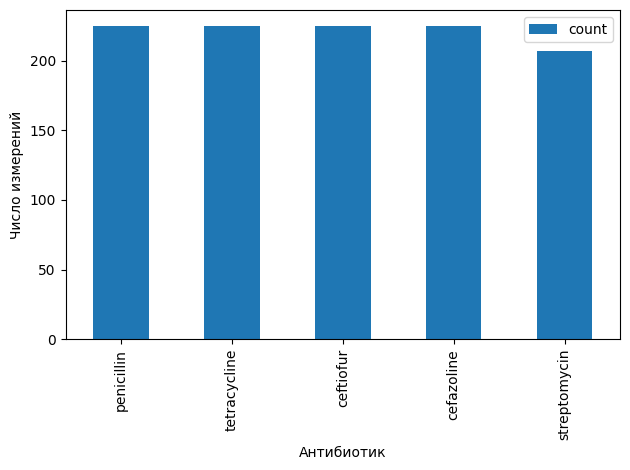

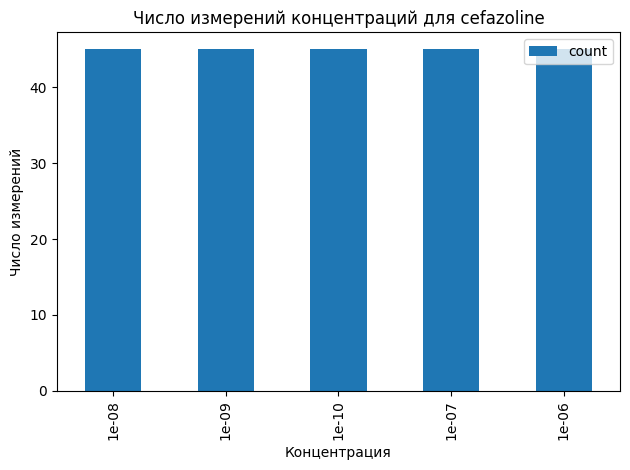

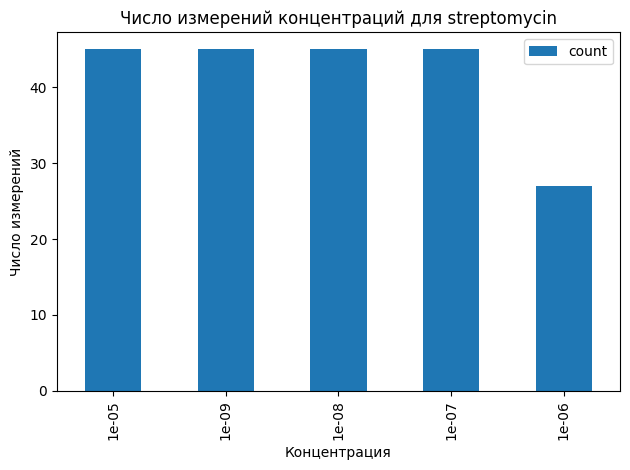

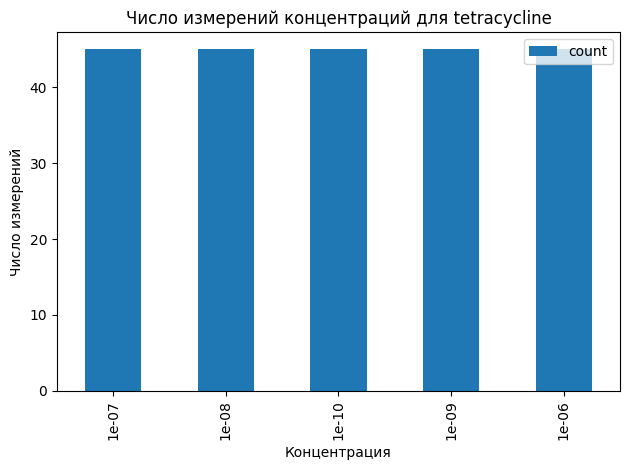

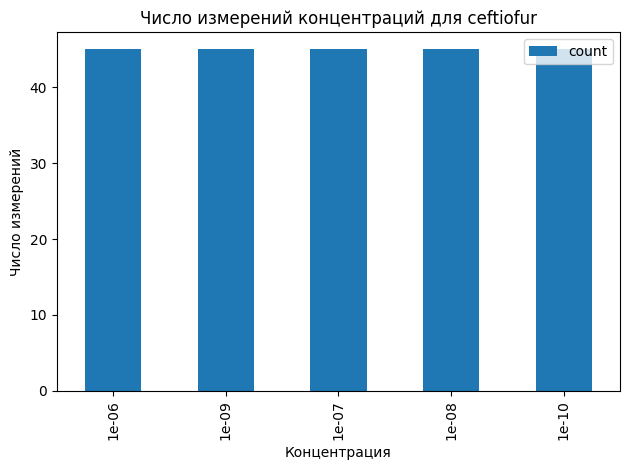

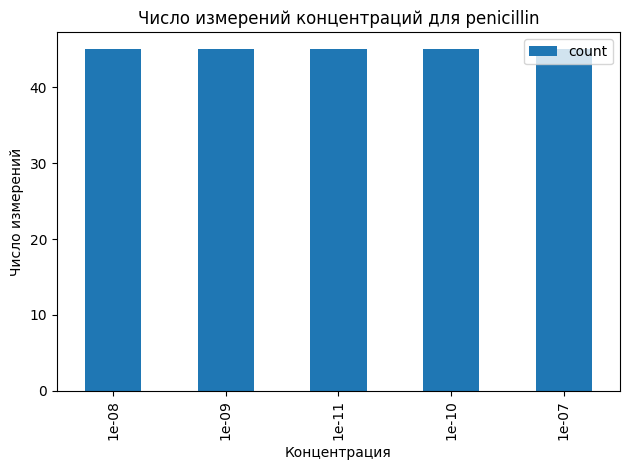

In [7]:
#распределение измерений каждого антибиотика
big_frame_1['antibiotic'].value_counts().plot.bar(legend=True)
plt.xlabel('Антибиотик')
plt.ylabel('Число измерений')
plt.tight_layout()
plt.show()
#распределение для измерений концентрации у каждого антибиотика
for antibio in antibio_unique:
    big_frame_1[big_frame_1["antibiotic"].str.contains(antibio, flags=re.I)]['concentration'].value_counts().plot.bar(legend=True)
    plt.title(f'Число измерений концентраций для {antibio}')
    plt.xlabel('Концентрация')
    plt.ylabel('Число измерений')
    plt.tight_layout()
    plt.show()

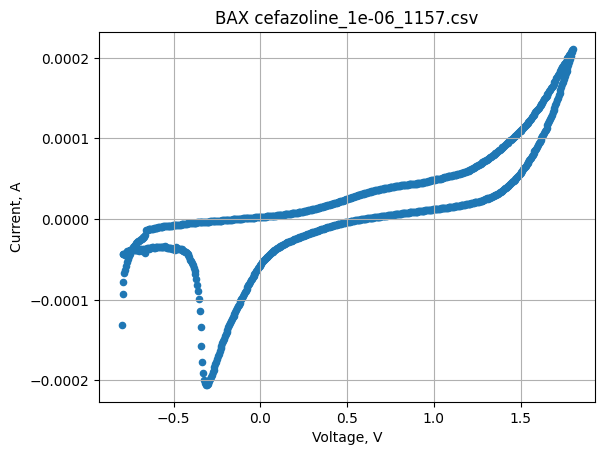

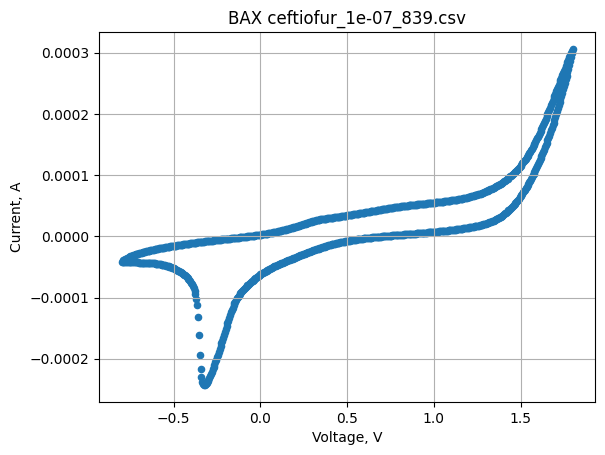

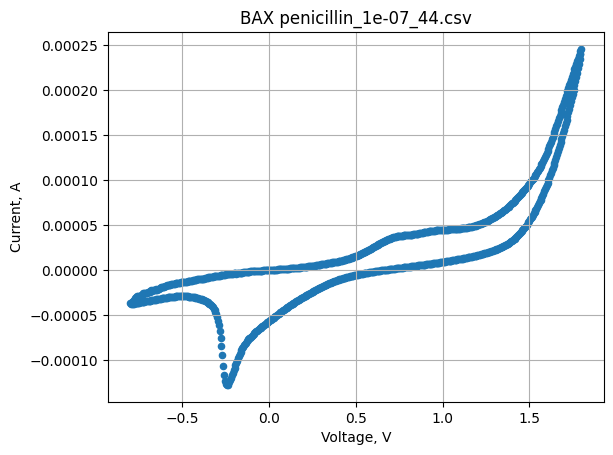

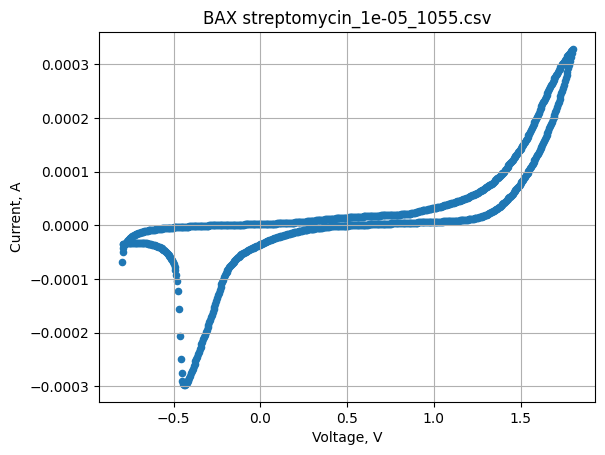

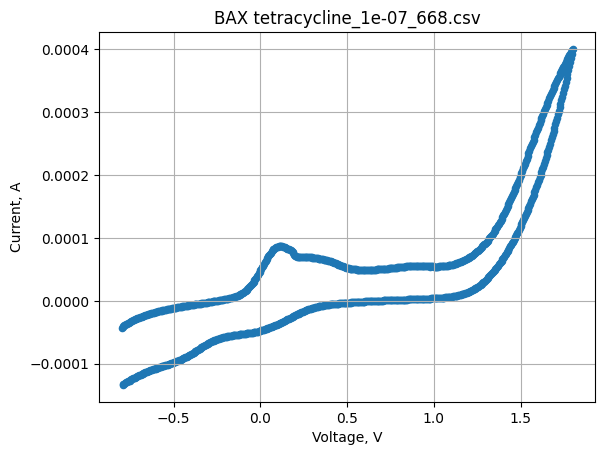

In [8]:
    #построим ВАХ для любого из файлов в каждом антибиотике
    voltamp = ['/content/milk_data/cefazoline_1e-06_1157.csv', '/content/milk_data/ceftiofur_1e-07_839.csv', '/content/milk_data/penicillin_1e-07_44.csv', '/content/milk_data/streptomycin_1e-05_1055.csv', '/content/milk_data/tetracycline_1e-07_668.csv']
    for voltamp in voltamp:
       name = voltamp.split('/')[3]
       cols = pd.read_csv(voltamp).columns.tolist()
       pd.read_csv(voltamp).plot.scatter(cols[1],cols[2])
       plt.grid()
       plt.title(f'ВАХ {name}')

In [9]:
zip_file='/content/drive/MyDrive/milk_data_all.zip'
#распаковывем зипку
milk_data = zipfile.ZipFile(zip_file)
milk_data.extractall()
#переходим в нужную директорию
zip_directory = '/content/milk_data_all'
file_list_antibiotics = os.listdir(zip_directory)
#просто проверяем, что все сохранилось и у нас есть доступ
len(file_list_antibiotics)

1377

In [11]:
file_name=[]
presence=[]
dfs = [[]*len(file_list_antibiotics)]
#читаем файлы
for file_title in file_list_antibiotics:
    file_name=file_title.split('_')
    if file_name[0]=='milk':
        presence.append(0)
    else:
      presence.append(1)
    full_file_path = os.path.join(zip_directory, file_title)
    #считываем столбцы с амперами
    dfs.append([pd.read_csv(full_file_path)['Current, A']])
    file_name=[]
#Создаем массив данных (наша будущая таблица)
big_frame_all = pd.concat([df[0] for df in dfs[1:]], axis=1)
#переворачиваем таблицу
big_frame_all = big_frame_all.transpose()
#сохраняем вольтажи, потом называем столбиками
list_V = pd.read_csv('/content/milk_data/cefazoline_1e-06_1157.csv')['Voltage, V']
#присваиваем столбцам вольты, при которых были проведены измерения
big_frame_all.columns=list_V
#добавляем наши столбцы с названием антибиотика и концентрацией
big_frame_all['presence']=presence
#сохраняем файл
big_frame_all


"Voltage, V",-0.8,-0.795,-0.79,-0.785,-0.78,-0.775,-0.77,-0.765,-0.76,-0.755,...,-0.755,-0.76,-0.765,-0.77,-0.775,-0.78,-0.785,-0.79,-0.795,presence
"Current, A",-0.000031,-0.000030,-0.000029,-0.000028,-0.000028,-0.000027,-0.000027,-0.000026,-0.000026,-0.000025,...,-0.000030,-0.000030,-0.000030,-0.000030,-0.000030,-0.000030,-0.000030,-0.000030,-0.000031,1
"Current, A",-0.000104,-0.000068,-0.000054,-0.000045,-0.000044,-0.000040,-0.000036,-0.000033,-0.000031,-0.000030,...,-0.000039,-0.000039,-0.000039,-0.000039,-0.000040,-0.000040,-0.000040,-0.000040,-0.000040,1
"Current, A",-0.000037,-0.000028,-0.000024,-0.000021,-0.000023,-0.000022,-0.000020,-0.000019,-0.000019,-0.000018,...,-0.000023,-0.000023,-0.000023,-0.000023,-0.000023,-0.000023,-0.000023,-0.000023,-0.000023,0
"Current, A",-0.000037,-0.000036,-0.000035,-0.000034,-0.000033,-0.000032,-0.000032,-0.000031,-0.000030,-0.000030,...,-0.000038,-0.000038,-0.000038,-0.000038,-0.000038,-0.000038,-0.000038,-0.000038,-0.000038,0
"Current, A",-0.000037,-0.000036,-0.000035,-0.000034,-0.000034,-0.000033,-0.000032,-0.000032,-0.000031,-0.000031,...,-0.000037,-0.000037,-0.000037,-0.000037,-0.000037,-0.000037,-0.000037,-0.000037,-0.000037,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Current, A",-0.000054,-0.000052,-0.000050,-0.000049,-0.000048,-0.000046,-0.000045,-0.000044,-0.000043,-0.000042,...,-0.000189,-0.000166,-0.000147,-0.000135,-0.000125,-0.000118,-0.000112,-0.000107,-0.000102,1
"Current, A",-0.000108,-0.000074,-0.000059,-0.000049,-0.000047,-0.000042,-0.000038,-0.000035,-0.000032,-0.000030,...,-0.000042,-0.000042,-0.000042,-0.000042,-0.000042,-0.000042,-0.000043,-0.000043,-0.000043,1
"Current, A",-0.000049,-0.000034,-0.000028,-0.000023,-0.000028,-0.000026,-0.000024,-0.000022,-0.000022,-0.000021,...,-0.000036,-0.000036,-0.000036,-0.000036,-0.000036,-0.000036,-0.000036,-0.000036,-0.000036,1
"Current, A",-0.000117,-0.000075,-0.000058,-0.000047,-0.000045,-0.000040,-0.000036,-0.000033,-0.000031,-0.000029,...,-0.000042,-0.000042,-0.000042,-0.000042,-0.000042,-0.000042,-0.000042,-0.000043,-0.000043,1


In [26]:
d = preprocessing.normalize(big_frame_all, axis=0)
scaled_big_frame_all = pd.DataFrame(d, columns=big_frame_all.columns, index=big_frame_all.index)
del scaled_big_frame_all['presence']
scaled_big_frame_all['presence'] = big_frame_all['presence']
scaled_big_frame_all

"Voltage, V",-0.8,-0.795,-0.79,-0.785,-0.78,-0.775,-0.77,-0.765,-0.76,-0.755,...,-0.755,-0.76,-0.765,-0.77,-0.775,-0.78,-0.785,-0.79,-0.795,presence
"Current, A",-0.009174,-0.010835,-0.011760,-0.012465,-0.012962,-0.013361,-0.013646,-0.013887,-0.014078,-0.014270,...,-0.011229,-0.011320,-0.011402,-0.011478,-0.011552,-0.011628,-0.011707,-0.011780,-0.011854,1
"Current, A",-0.031157,-0.024599,-0.021755,-0.019856,-0.020463,-0.019374,-0.018439,-0.017660,-0.016978,-0.016680,...,-0.014670,-0.014796,-0.014912,-0.015021,-0.015121,-0.015228,-0.015338,-0.015438,-0.015542,1
"Current, A",-0.010940,-0.010211,-0.009756,-0.009399,-0.010861,-0.010644,-0.010434,-0.010237,-0.010246,-0.010073,...,-0.008479,-0.008533,-0.008588,-0.008627,-0.008670,-0.008728,-0.008779,-0.008833,-0.008890,0
"Current, A",-0.011094,-0.013048,-0.014104,-0.014902,-0.015447,-0.015871,-0.016175,-0.016415,-0.016602,-0.016791,...,-0.014238,-0.014298,-0.014338,-0.014377,-0.014417,-0.014458,-0.014507,-0.014544,-0.014589,0
"Current, A",-0.011074,-0.013074,-0.014188,-0.015046,-0.015653,-0.016141,-0.016499,-0.016799,-0.017038,-0.017282,...,-0.013887,-0.013975,-0.014051,-0.014120,-0.014185,-0.014253,-0.014321,-0.014382,-0.014441,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Current, A",-0.016093,-0.018855,-0.020317,-0.021400,-0.022115,-0.022655,-0.023012,-0.023283,-0.023474,-0.023665,...,-0.070851,-0.062721,-0.055854,-0.051276,-0.047826,-0.045273,-0.043110,-0.041276,-0.039668,1
"Current, A",-0.032410,-0.026747,-0.023747,-0.021603,-0.021801,-0.020457,-0.019305,-0.018337,-0.017488,-0.017080,...,-0.015837,-0.015949,-0.016043,-0.016133,-0.016215,-0.016300,-0.016389,-0.016464,-0.016543,1
"Current, A",-0.014685,-0.012278,-0.011175,-0.010103,-0.013043,-0.012516,-0.012023,-0.011657,-0.011999,-0.011693,...,-0.013644,-0.013690,-0.013724,-0.013763,-0.013816,-0.013860,-0.013910,-0.013952,-0.014013,1
"Current, A",-0.035020,-0.027257,-0.023322,-0.020768,-0.020988,-0.019607,-0.018467,-0.017545,-0.016760,-0.016383,...,-0.015743,-0.015857,-0.015961,-0.016058,-0.016155,-0.016248,-0.016357,-0.016447,-0.016532,1


In [27]:
X = scaled_big_frame_all.drop(['presence'], axis=1)
y= scaled_big_frame_all['presence']

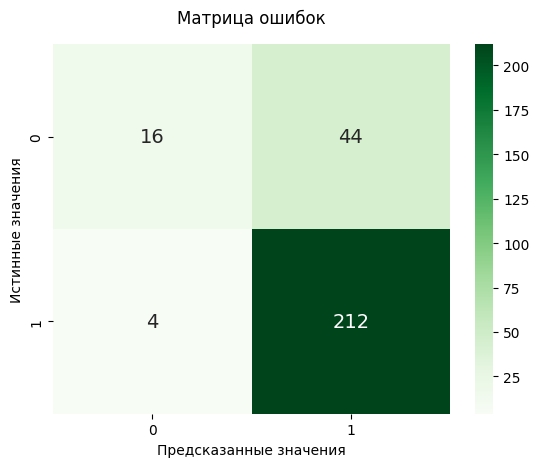

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={'fontsize': 14})
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица ошибок', pad=15)
plt.show()



In [41]:
report = classification_report(y_test, log_reg.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.80      0.27      0.40        60
           1       0.83      0.98      0.90       216

    accuracy                           0.83       276
   macro avg       0.81      0.62      0.65       276
weighted avg       0.82      0.83      0.79       276



AUC: 0.918


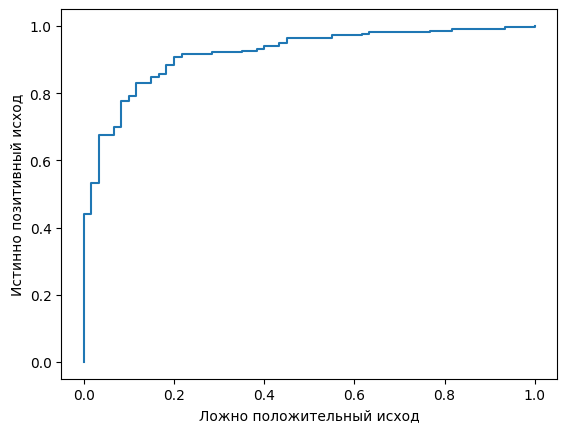

In [71]:
y_pred_proba = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

# построение ROC кривой
plt.plot(fpr, tpr)
plt.ylabel('Истинно позитивный исход')
plt.xlabel('Ложно положительный исход')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC: %.3f" % auc)
plt.show()

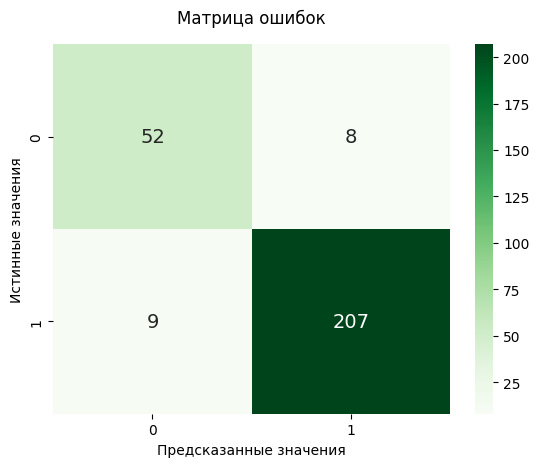

In [42]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
log_reg.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={'fontsize': 14})
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица ошибок', pad=15)
plt.show()


In [43]:
report = classification_report(y_test, knn.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        60
           1       0.96      0.96      0.96       216

    accuracy                           0.94       276
   macro avg       0.91      0.91      0.91       276
weighted avg       0.94      0.94      0.94       276



AUC: 0.976


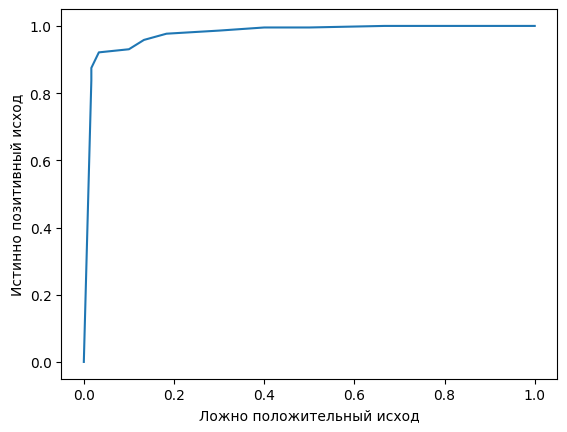

In [72]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

# построение ROC кривой
plt.plot(fpr, tpr)
plt.ylabel('Истинно позитивный исход')
plt.xlabel('Ложно положительный исход')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC: %.3f" % auc)
plt.show()

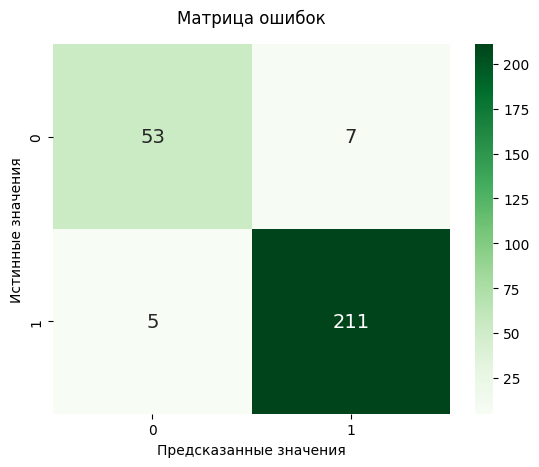

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

classifer = RandomForestClassifier(random_state=42)
classifer.fit(X_train, y_train)
y_pred_classifer =  classifer.predict(X_test)
classifer.fit(X_train, y_train)
y_pred_classifer = classifer.predict(X_test)
cm = confusion_matrix(y_test, y_pred_classifer)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={'fontsize': 14})
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица ошибок', pad=15)
plt.show()

In [51]:
report = classification_report(y_test, classifer.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.91      0.88      0.90        60
           1       0.97      0.98      0.97       216

    accuracy                           0.96       276
   macro avg       0.94      0.93      0.94       276
weighted avg       0.96      0.96      0.96       276



AUC: 0.984


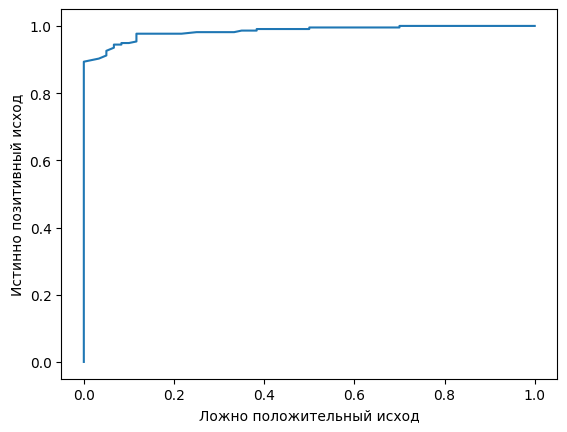

In [74]:
y_pred_proba = classifer.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

# построение ROC кривой
plt.plot(fpr, tpr)
plt.ylabel('Истинно позитивный исход')
plt.xlabel('Ложно положительный исход')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC: %.3f" % auc)
plt.show()

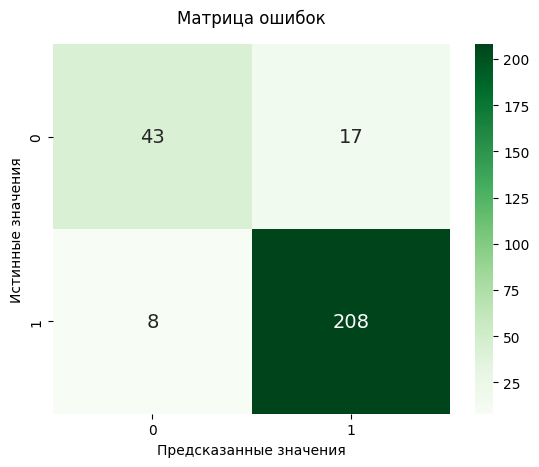

In [79]:
from mlxtend.plotting import plot_decision_regions
from sklearn.utils import check_random_state, check_array
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR, _libsvm
from sklearn.datasets import load_iris, load_diabetes, load_wine, load_breast_cancer
linear_svm = SVC(random_state=42, probability=True)
linear_svm.fit(X_train, y_train)
y_pred_linear_svm =  linear_svm.predict(X_test)
linear_svm.fit(X_train, y_train)
y_pred_linear_svm = linear_svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred_linear_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={'fontsize': 14})
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица ошибок', pad=15)
plt.show()

In [80]:
report = classification_report(y_test, linear_svm.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.84      0.72      0.77        60
           1       0.92      0.96      0.94       216

    accuracy                           0.91       276
   macro avg       0.88      0.84      0.86       276
weighted avg       0.91      0.91      0.91       276



AUC: 0.949


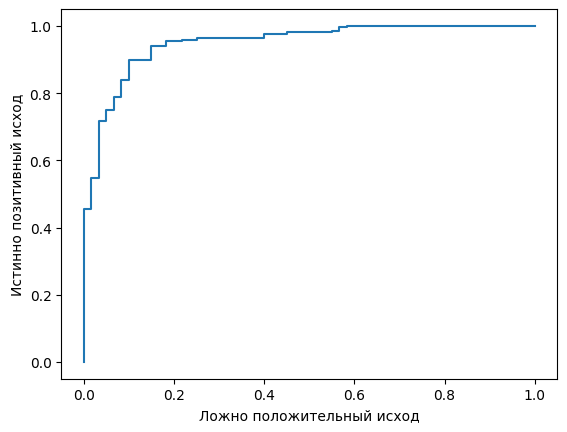

In [81]:
y_pred_proba = linear_svm.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

# построение ROC кривой
plt.plot(fpr, tpr)
plt.ylabel('Истинно позитивный исход')
plt.xlabel('Ложно положительный исход')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC: %.3f" % auc)
plt.show()

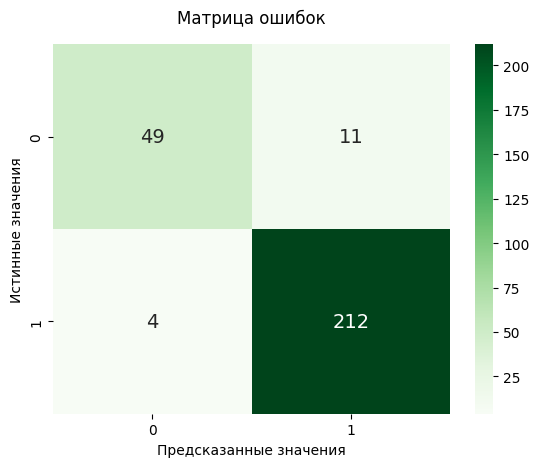

In [64]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train.values, y_train.values)
y_pred_model = model.predict(X_test.values)
cm = confusion_matrix(y_test, y_pred_model)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={'fontsize': 14})
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица ошибок', pad=15)
plt.show()

In [67]:
report = classification_report(y_test, model.predict(X_test.values))
print(report)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        60
           1       0.95      0.98      0.97       216

    accuracy                           0.95       276
   macro avg       0.94      0.90      0.92       276
weighted avg       0.94      0.95      0.94       276



AUC: 0.979


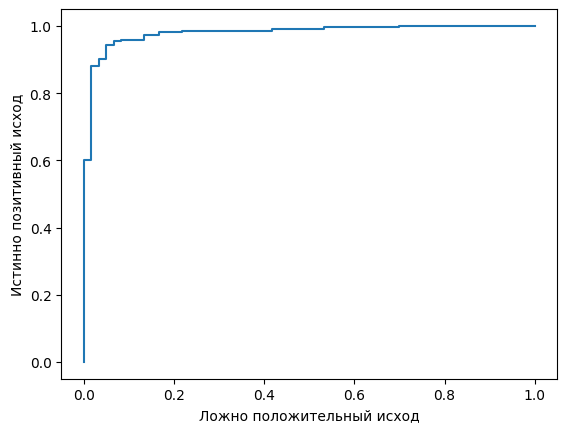

In [77]:
y_pred_proba = model.predict_proba(X_test.values)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

# построение ROC кривой
plt.plot(fpr, tpr)
plt.ylabel('Истинно позитивный исход')
plt.xlabel('Ложно положительный исход')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC: %.3f" % auc)
plt.show()

In [89]:
antibiotic=[]
concentration=[]
file_name=[]
pd.reset_option('all')
dfs = [[]*len(file_list_antibiotics)]
#читаем файлы
for file_title in file_list_antibiotics:
    file_name=file_title.split('_')
    antibiotic.append(file_name[0])
    full_file_path = os.path.join(zip_directory, file_title)
    #считываем столбцы с амперами
    dfs.append([pd.read_csv(full_file_path)['Current, A']])
    file_name=[]
#Создаем массив данных (наша будущая таблица)
frame = pd.concat([df[0] for df in dfs[1:]], axis=1)
#переворачиваем таблицу
frame = frame.transpose()
#сохраняем вольтажи, потом называем столбиками
list_V = pd.read_csv('/content/milk_data/cefazoline_1e-06_1157.csv')['Voltage, V']
#присваиваем столбцам вольты, при которых были проведены измерения
frame.columns=list_V
#добавляем наши столбцы с названием антибиотика и концентрацией
frame['antibiotic']=antibiotic
frame

"Voltage, V",-0.8,-0.795,-0.79,-0.785,-0.78,-0.775,-0.77,-0.765,-0.76,-0.755,...,-0.755,-0.76,-0.765,-0.77,-0.775,-0.78,-0.785,-0.79,-0.795,antibiotic
"Current, A",-0.000031,-0.000030,-0.000029,-0.000028,-0.000028,-0.000027,-0.000027,-0.000026,-0.000026,-0.000025,...,-0.000030,-0.000030,-0.000030,-0.000030,-0.000030,-0.000030,-0.000030,-0.000030,-0.000031,penicillin
"Current, A",-0.000104,-0.000068,-0.000054,-0.000045,-0.000044,-0.000040,-0.000036,-0.000033,-0.000031,-0.000030,...,-0.000039,-0.000039,-0.000039,-0.000039,-0.000040,-0.000040,-0.000040,-0.000040,-0.000040,tetracycline
"Current, A",-0.000037,-0.000028,-0.000024,-0.000021,-0.000023,-0.000022,-0.000020,-0.000019,-0.000019,-0.000018,...,-0.000023,-0.000023,-0.000023,-0.000023,-0.000023,-0.000023,-0.000023,-0.000023,-0.000023,milk
"Current, A",-0.000037,-0.000036,-0.000035,-0.000034,-0.000033,-0.000032,-0.000032,-0.000031,-0.000030,-0.000030,...,-0.000038,-0.000038,-0.000038,-0.000038,-0.000038,-0.000038,-0.000038,-0.000038,-0.000038,milk
"Current, A",-0.000037,-0.000036,-0.000035,-0.000034,-0.000034,-0.000033,-0.000032,-0.000032,-0.000031,-0.000031,...,-0.000037,-0.000037,-0.000037,-0.000037,-0.000037,-0.000037,-0.000037,-0.000037,-0.000037,milk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Current, A",-0.000054,-0.000052,-0.000050,-0.000049,-0.000048,-0.000046,-0.000045,-0.000044,-0.000043,-0.000042,...,-0.000189,-0.000166,-0.000147,-0.000135,-0.000125,-0.000118,-0.000112,-0.000107,-0.000102,tetracycline
"Current, A",-0.000108,-0.000074,-0.000059,-0.000049,-0.000047,-0.000042,-0.000038,-0.000035,-0.000032,-0.000030,...,-0.000042,-0.000042,-0.000042,-0.000042,-0.000042,-0.000042,-0.000043,-0.000043,-0.000043,tetracycline
"Current, A",-0.000049,-0.000034,-0.000028,-0.000023,-0.000028,-0.000026,-0.000024,-0.000022,-0.000022,-0.000021,...,-0.000036,-0.000036,-0.000036,-0.000036,-0.000036,-0.000036,-0.000036,-0.000036,-0.000036,penicillin
"Current, A",-0.000117,-0.000075,-0.000058,-0.000047,-0.000045,-0.000040,-0.000036,-0.000033,-0.000031,-0.000029,...,-0.000042,-0.000042,-0.000042,-0.000042,-0.000042,-0.000042,-0.000042,-0.000043,-0.000043,tetracycline


In [91]:
frame['antibiotic'].replace({'penicillin': 0, 'tetracycline': 1, 'cefazoline': 2, 'streptomycin': 3, 'ceftiofur' : 4, 'milk' : 5}, inplace=True)
frame

"Voltage, V",-0.8,-0.795,-0.79,-0.785,-0.78,-0.775,-0.77,-0.765,-0.76,-0.755,...,-0.755,-0.76,-0.765,-0.77,-0.775,-0.78,-0.785,-0.79,-0.795,antibiotic
"Current, A",-0.000031,-0.000030,-0.000029,-0.000028,-0.000028,-0.000027,-0.000027,-0.000026,-0.000026,-0.000025,...,-0.000030,-0.000030,-0.000030,-0.000030,-0.000030,-0.000030,-0.000030,-0.000030,-0.000031,0
"Current, A",-0.000104,-0.000068,-0.000054,-0.000045,-0.000044,-0.000040,-0.000036,-0.000033,-0.000031,-0.000030,...,-0.000039,-0.000039,-0.000039,-0.000039,-0.000040,-0.000040,-0.000040,-0.000040,-0.000040,1
"Current, A",-0.000037,-0.000028,-0.000024,-0.000021,-0.000023,-0.000022,-0.000020,-0.000019,-0.000019,-0.000018,...,-0.000023,-0.000023,-0.000023,-0.000023,-0.000023,-0.000023,-0.000023,-0.000023,-0.000023,5
"Current, A",-0.000037,-0.000036,-0.000035,-0.000034,-0.000033,-0.000032,-0.000032,-0.000031,-0.000030,-0.000030,...,-0.000038,-0.000038,-0.000038,-0.000038,-0.000038,-0.000038,-0.000038,-0.000038,-0.000038,5
"Current, A",-0.000037,-0.000036,-0.000035,-0.000034,-0.000034,-0.000033,-0.000032,-0.000032,-0.000031,-0.000031,...,-0.000037,-0.000037,-0.000037,-0.000037,-0.000037,-0.000037,-0.000037,-0.000037,-0.000037,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Current, A",-0.000054,-0.000052,-0.000050,-0.000049,-0.000048,-0.000046,-0.000045,-0.000044,-0.000043,-0.000042,...,-0.000189,-0.000166,-0.000147,-0.000135,-0.000125,-0.000118,-0.000112,-0.000107,-0.000102,1
"Current, A",-0.000108,-0.000074,-0.000059,-0.000049,-0.000047,-0.000042,-0.000038,-0.000035,-0.000032,-0.000030,...,-0.000042,-0.000042,-0.000042,-0.000042,-0.000042,-0.000042,-0.000043,-0.000043,-0.000043,1
"Current, A",-0.000049,-0.000034,-0.000028,-0.000023,-0.000028,-0.000026,-0.000024,-0.000022,-0.000022,-0.000021,...,-0.000036,-0.000036,-0.000036,-0.000036,-0.000036,-0.000036,-0.000036,-0.000036,-0.000036,0
"Current, A",-0.000117,-0.000075,-0.000058,-0.000047,-0.000045,-0.000040,-0.000036,-0.000033,-0.000031,-0.000029,...,-0.000042,-0.000042,-0.000042,-0.000042,-0.000042,-0.000042,-0.000042,-0.000043,-0.000043,1


In [95]:
frame_new = preprocessing.normalize(frame, axis=0)
scaled_big_frame_all = pd.DataFrame(frame_new, columns=frame.columns, index=frame.index)
# Convert frame_new to DataFrame before deleting the column
frame_new = scaled_big_frame_all.copy()  # Create a DataFrame copy
del frame_new['antibiotic']
frame_new['antibiotic'] = frame['antibiotic']
frame_new

"Voltage, V",-0.8,-0.795,-0.79,-0.785,-0.78,-0.775,-0.77,-0.765,-0.76,-0.755,...,-0.755,-0.76,-0.765,-0.77,-0.775,-0.78,-0.785,-0.79,-0.795,antibiotic
"Current, A",-0.009174,-0.010835,-0.011760,-0.012465,-0.012962,-0.013361,-0.013646,-0.013887,-0.014078,-0.014270,...,-0.011229,-0.011320,-0.011402,-0.011478,-0.011552,-0.011628,-0.011707,-0.011780,-0.011854,0
"Current, A",-0.031157,-0.024599,-0.021755,-0.019856,-0.020463,-0.019374,-0.018439,-0.017660,-0.016978,-0.016680,...,-0.014670,-0.014796,-0.014912,-0.015021,-0.015121,-0.015228,-0.015338,-0.015438,-0.015542,1
"Current, A",-0.010940,-0.010211,-0.009756,-0.009399,-0.010861,-0.010644,-0.010434,-0.010237,-0.010246,-0.010073,...,-0.008479,-0.008533,-0.008588,-0.008627,-0.008670,-0.008728,-0.008779,-0.008833,-0.008890,5
"Current, A",-0.011094,-0.013048,-0.014104,-0.014902,-0.015447,-0.015871,-0.016175,-0.016415,-0.016602,-0.016791,...,-0.014238,-0.014298,-0.014338,-0.014377,-0.014417,-0.014458,-0.014507,-0.014544,-0.014589,5
"Current, A",-0.011074,-0.013074,-0.014188,-0.015046,-0.015653,-0.016141,-0.016499,-0.016799,-0.017038,-0.017282,...,-0.013887,-0.013975,-0.014051,-0.014120,-0.014185,-0.014253,-0.014321,-0.014382,-0.014441,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Current, A",-0.016093,-0.018855,-0.020317,-0.021400,-0.022115,-0.022655,-0.023012,-0.023283,-0.023474,-0.023665,...,-0.070851,-0.062721,-0.055854,-0.051276,-0.047826,-0.045273,-0.043110,-0.041276,-0.039668,1
"Current, A",-0.032410,-0.026747,-0.023747,-0.021603,-0.021801,-0.020457,-0.019305,-0.018337,-0.017488,-0.017080,...,-0.015837,-0.015949,-0.016043,-0.016133,-0.016215,-0.016300,-0.016389,-0.016464,-0.016543,1
"Current, A",-0.014685,-0.012278,-0.011175,-0.010103,-0.013043,-0.012516,-0.012023,-0.011657,-0.011999,-0.011693,...,-0.013644,-0.013690,-0.013724,-0.013763,-0.013816,-0.013860,-0.013910,-0.013952,-0.014013,0
"Current, A",-0.035020,-0.027257,-0.023322,-0.020768,-0.020988,-0.019607,-0.018467,-0.017545,-0.016760,-0.016383,...,-0.015743,-0.015857,-0.015961,-0.016058,-0.016155,-0.016248,-0.016357,-0.016447,-0.016532,1


In [97]:
X = frame_new.drop(['antibiotic'], axis=1)
y= frame_new['antibiotic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

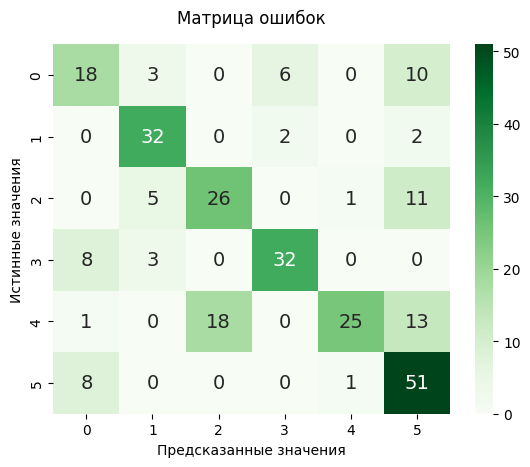

In [100]:
log_reg = LogisticRegression(random_state=42, multi_class='multinomial')
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={'fontsize': 14})
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица ошибок', pad=15)
plt.show()


In [101]:
report = classification_report(y_test, log_reg.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.51      0.49      0.50        37
           1       0.74      0.89      0.81        36
           2       0.59      0.60      0.60        43
           3       0.80      0.74      0.77        43
           4       0.93      0.44      0.60        57
           5       0.59      0.85      0.69        60

    accuracy                           0.67       276
   macro avg       0.69      0.67      0.66       276
weighted avg       0.70      0.67      0.66       276



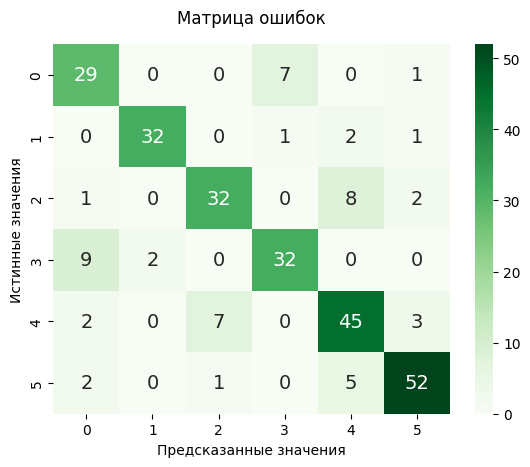

In [106]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
log_reg.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={'fontsize': 14})
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица ошибок', pad=15)
plt.show()

In [107]:
report = classification_report(y_test, knn.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.67      0.78      0.72        37
           1       0.94      0.89      0.91        36
           2       0.80      0.74      0.77        43
           3       0.80      0.74      0.77        43
           4       0.75      0.79      0.77        57
           5       0.88      0.87      0.87        60

    accuracy                           0.80       276
   macro avg       0.81      0.80      0.80       276
weighted avg       0.81      0.80      0.81       276



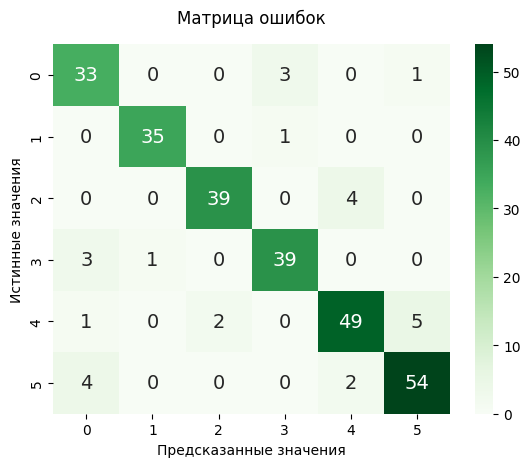

In [104]:
classifer = RandomForestClassifier(random_state=42)
classifer.fit(X_train, y_train)
y_pred_classifer = classifer.predict(X_test)
cm = confusion_matrix(y_test, y_pred_classifer)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={'fontsize': 14})
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица ошибок', pad=15)
plt.show()

In [105]:
report = classification_report(y_test, classifer.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.80      0.89      0.85        37
           1       0.97      0.97      0.97        36
           2       0.95      0.91      0.93        43
           3       0.91      0.91      0.91        43
           4       0.89      0.86      0.88        57
           5       0.90      0.90      0.90        60

    accuracy                           0.90       276
   macro avg       0.90      0.91      0.90       276
weighted avg       0.90      0.90      0.90       276



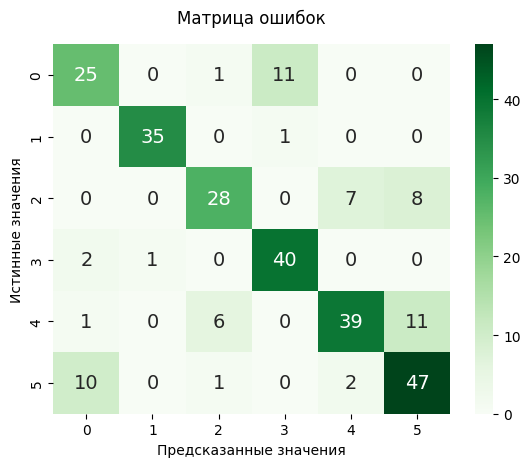

In [108]:
from mlxtend.plotting import plot_decision_regions
from sklearn.utils import check_random_state, check_array
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR, _libsvm
from sklearn.datasets import load_iris, load_diabetes, load_wine, load_breast_cancer
linear_svm = SVC(random_state=42, probability=True)
linear_svm.fit(X_train, y_train)
y_pred_linear_svm =  linear_svm.predict(X_test)
linear_svm.fit(X_train, y_train)
y_pred_linear_svm = linear_svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred_linear_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={'fontsize': 14})
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица ошибок', pad=15)
plt.show()

In [109]:
report = classification_report(y_test, linear_svm.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.66      0.68      0.67        37
           1       0.97      0.97      0.97        36
           2       0.78      0.65      0.71        43
           3       0.77      0.93      0.84        43
           4       0.81      0.68      0.74        57
           5       0.71      0.78      0.75        60

    accuracy                           0.78       276
   macro avg       0.78      0.78      0.78       276
weighted avg       0.78      0.78      0.77       276



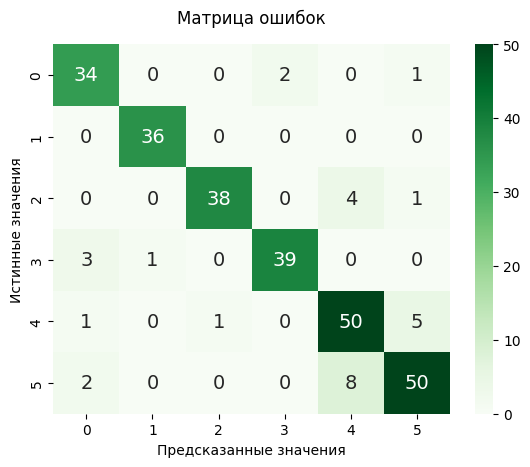

In [110]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train.values, y_train.values)
y_pred_model = model.predict(X_test.values)
cm = confusion_matrix(y_test, y_pred_model)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={'fontsize': 14})
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица ошибок', pad=15)
plt.show()

In [112]:
report = classification_report(y_test, model.predict(X_test.values))
print(report)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        37
           1       0.97      1.00      0.99        36
           2       0.97      0.88      0.93        43
           3       0.95      0.91      0.93        43
           4       0.81      0.88      0.84        57
           5       0.88      0.83      0.85        60

    accuracy                           0.89       276
   macro avg       0.91      0.90      0.90       276
weighted avg       0.90      0.89      0.90       276



In [ ]:
итого наилучшая точность у Random forest и KNN